### Tazmeen Afroz
### Roll No :22P-9252
### Assignment 2

In [1]:
# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn

# Visualization libraries
import pydotplus
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import ConfusionMatrixDisplay
#Normalization
from sklearn.preprocessing import MinMaxScaler

# Modeling and Machine Learning
from IPython.display import Image 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
import graphviz
import pydotplus 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




In [2]:
df = pd.read_csv('mnist.csv')


### Dataset Description

The dataset consists of **42,000 samples**, each represented as a row in the data matrix. The dataset has **785 columns**:

- **Label Column (label):**  
  The first column represents the class label of the sample. It ranges from 0 to 9, corresponding to the digits in the MNIST dataset.

- **Pixel Columns (pixel0 to pixel783):**  
  The remaining 784 columns represent the pixel intensity values of a 28x28 grayscale image, where each pixel value is an integer ranging from 0 to 255. These values have been flattened into a single row for each sample.

#### Summary of the Structure:
- **Shape:** (42000, 785)
- **Features:**
  - `label`: Target variable indicating the digit (0-9).
  - `pixel0` to `pixel783`: Intensity values of the image pixels.


In [3]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:

df.shape


(42000, 785)

### Visualization

/tmp/ipykernel_52087/1901595032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values,  palette='coolwarm')


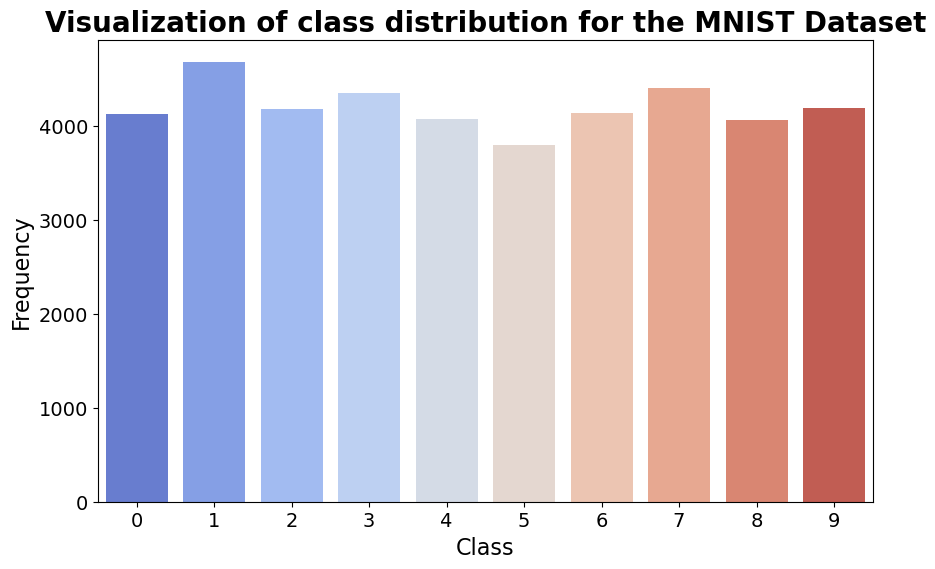

In [5]:
#barplot
value_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values,  palette='coolwarm')

plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()

In [41]:

#pie chart
value_counts = df['label'].value_counts().sort_index()


fig = px.pie(values=value_counts.values, names=value_counts.index, 
             title='Class Distribution for the MNIST Dataset')

fig.show()

#### showing the first 25 images in the dataset with their labels 


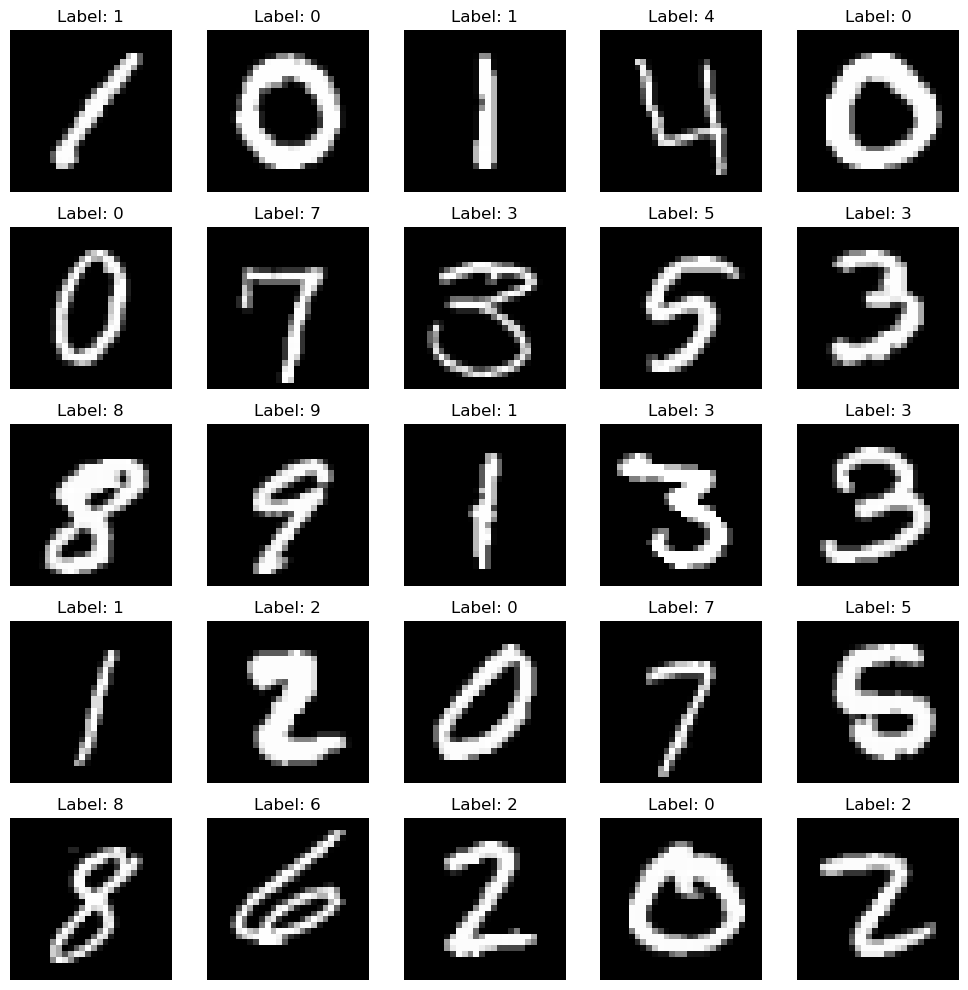

In [7]:
import matplotlib.pyplot as plt

def plot_digits(data, labels, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        image = data[i].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

num_images = 25
images = df.iloc[:num_images, 1:].values  
labels = df.iloc[:num_images, 0].values  
plot_digits(images, labels, num_images)


### Data Preprocessing: 
#### Flattening Images
#### The images are already in flattened format in the dataset (28x28 converted to 1D, 784 features).

### Normalization

In [8]:

scaler = MinMaxScaler()
features = [col for col in df.columns if col.startswith('pixel')]
df[features] = scaler.fit_transform(df[features])
df[features] = scaler.transform(df[features])


In [9]:
# test train split

X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                 df['label'], 
                                                  test_size=0.25, 
                                                  random_state=42)


#size
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((31500, 784), (10500, 784), (31500,), (10500,))

### Modeling

In [10]:

clf = DecisionTreeClassifier(max_depth=15, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15, random_state=42)

## Metrics

In [11]:

def acc(y_true: np.ndarray, y_pred: np.ndarray) -> float:
   
    return round(accuracy_score(y_true, y_pred) * 100, 2)


In [12]:
# decision tree evaluations

test_preds_baseline = clf.predict(X_test)

acc_baseline_test = acc(y_test, test_preds_baseline)

print(f'Decision Tree Test Accuracy: {acc_baseline_test}%')

print(f1_score(y_test, test_preds_baseline, average='weighted'))

print(classification_report(y_test, test_preds_baseline))


Decision Tree Test Accuracy: 85.67%
0.8564239577679221
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1025
           1       0.92      0.96      0.94      1146
           2       0.83      0.82      0.82      1072
           3       0.82      0.81      0.82      1151
           4       0.83      0.87      0.85      1024
           5       0.80      0.80      0.80       898
           6       0.90      0.90      0.90      1010
           7       0.91      0.87      0.89      1135
           8       0.81      0.78      0.79      1005
           9       0.82      0.83      0.83      1034

    accuracy                           0.86     10500
   macro avg       0.86      0.86      0.86     10500
weighted avg       0.86      0.86      0.86     10500



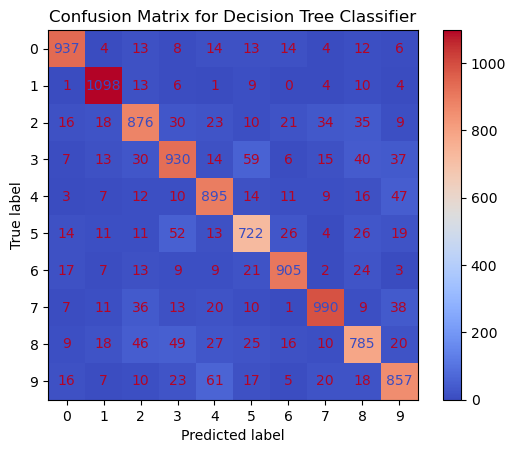

In [13]:
# Confusion Matrix
cm = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='coolwarm')

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [14]:


# SVM model
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)


svm_test_preds = svm_clf.predict(X_test)


# Accuracy and F1 scores
acc_svm_test = acc(y_test, svm_test_preds)
print(f'SVM Test accuracy: {acc_svm_test}%')

f1_svm_test = f1_score(y_test,svm_test_preds, average='weighted')
print(f'SVM Test F1 score: {round(f1_svm_test * 100, 2)}%')



SVM Test accuracy: 97.4%
SVM Test F1 score: 97.4%


In [15]:
#classification report
print(classification_report(y_test, test_preds_baseline))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1025
           1       0.92      0.96      0.94      1146
           2       0.83      0.82      0.82      1072
           3       0.82      0.81      0.82      1151
           4       0.83      0.87      0.85      1024
           5       0.80      0.80      0.80       898
           6       0.90      0.90      0.90      1010
           7       0.91      0.87      0.89      1135
           8       0.81      0.78      0.79      1005
           9       0.82      0.83      0.83      1034

    accuracy                           0.86     10500
   macro avg       0.86      0.86      0.86     10500
weighted avg       0.86      0.86      0.86     10500



Text(0.5, 1.0, 'Confusion Matrix for SVM Classifier')

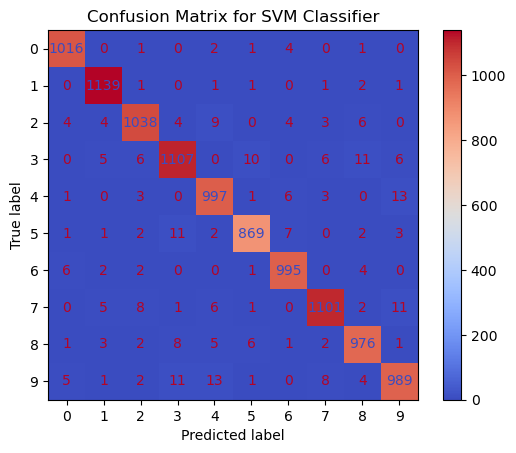

In [16]:

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_estimator(svm_clf, X_test, y_test, cmap='coolwarm')

plt.title('Confusion Matrix for SVM Classifier')

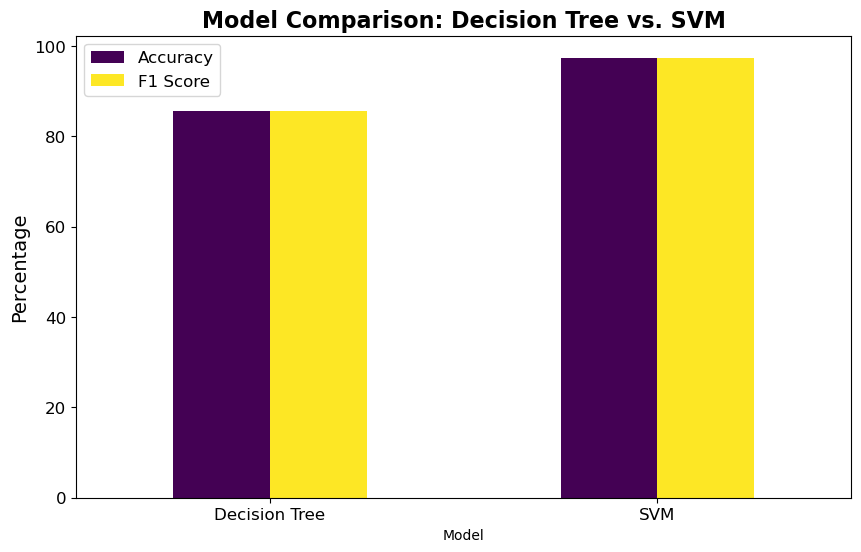

In [25]:
# Visualizing the accuracy and F1 scores for both models

# change f1-score of both to percentage

f1_dt = f1_score(y_test, test_preds_baseline, average='weighted') * 100
f1_svm = f1_svm_test * 100
comparison_metrics = pd.DataFrame({
    "Model": ["Decision Tree", "SVM"],
    "Accuracy": [acc_baseline_test, acc_svm_test],
    "F1 Score": [f1_dt, f1_svm]
})


comparison_metrics.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Comparison: Decision Tree vs. SVM", fontsize=16, weight="bold")
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


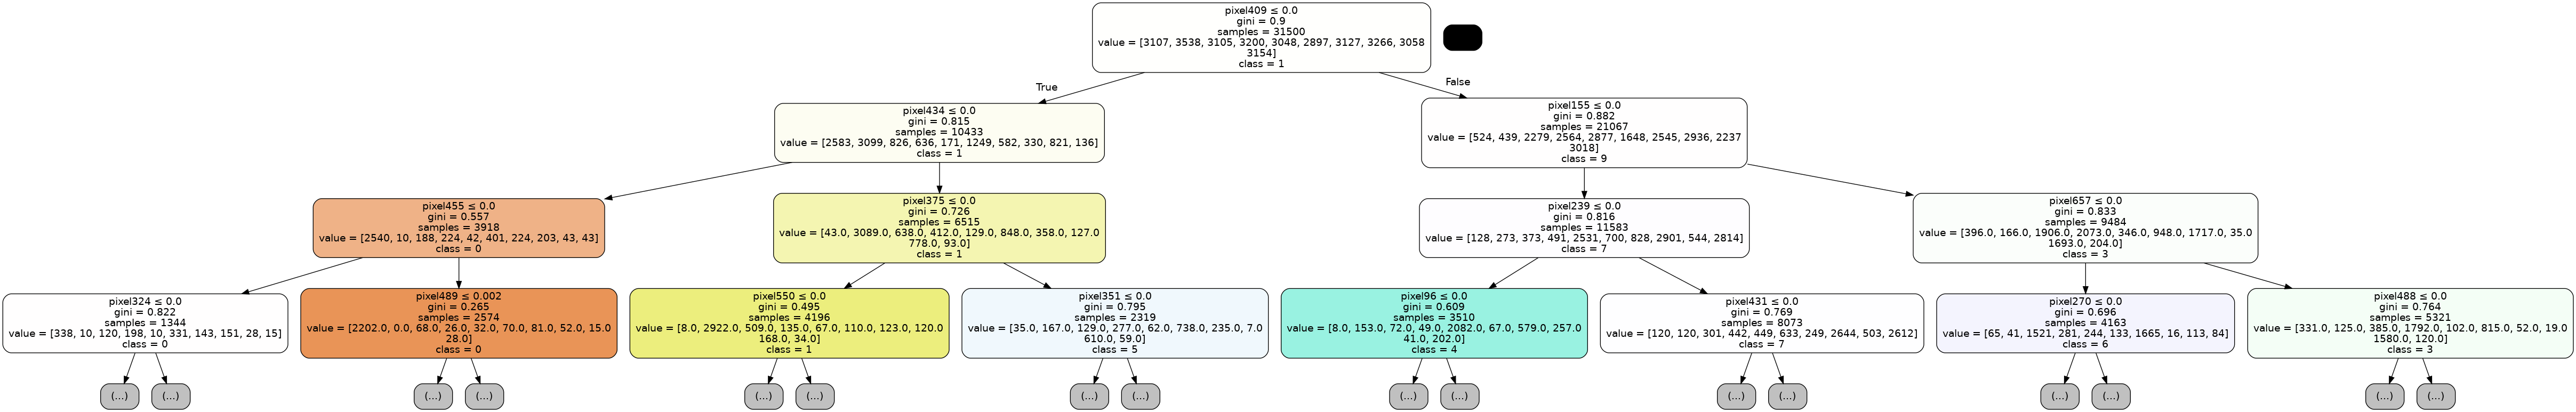

In [18]:
# Decision Tree Visualization

features = [col for col in df.columns if col.startswith('pixel')]


dot_data = export_graphviz(clf, out_file=None,
                            feature_names=features,
                            class_names=[str(i) for i in clf.classes_],
                            filled=True, rounded=True,
                            special_characters=True,
                            max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



### Decsiion Tree Depth vs Accuracy

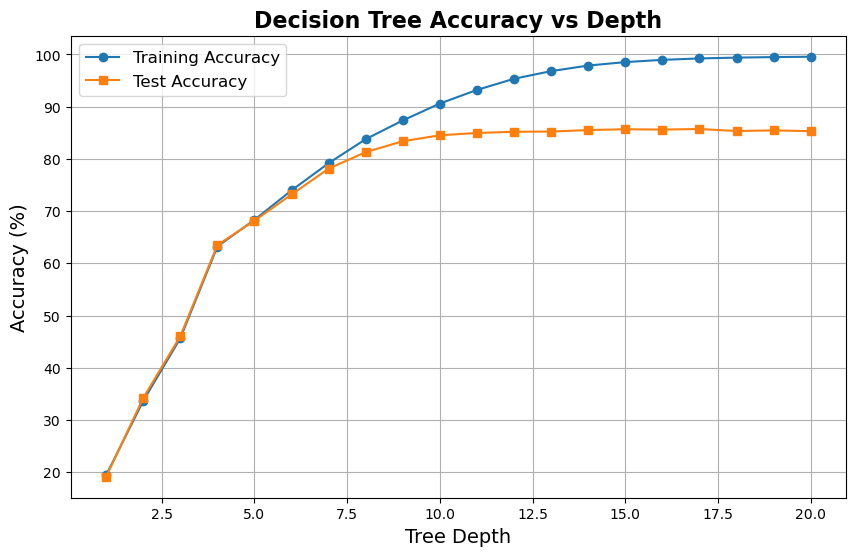

In [19]:

train_accuracies = []
val_accuracies = []


for depth in range(1, 21): 
    temp_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_clf.fit(X_train, y_train)
    train_acc = acc(y_train, temp_clf.predict(X_train))
    test_acc = acc(y_test, temp_clf.predict(X_test))
    train_accuracies.append(train_acc)
    val_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), val_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Decision Tree Accuracy vs Depth', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# testing on new dataset

In [35]:
# testing some random images and plotting them with their predictions
# on both models
test_new = pd.read_csv('test.csv')

test_new.tail(10)





,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/tazmeen/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/home/tazmeen/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



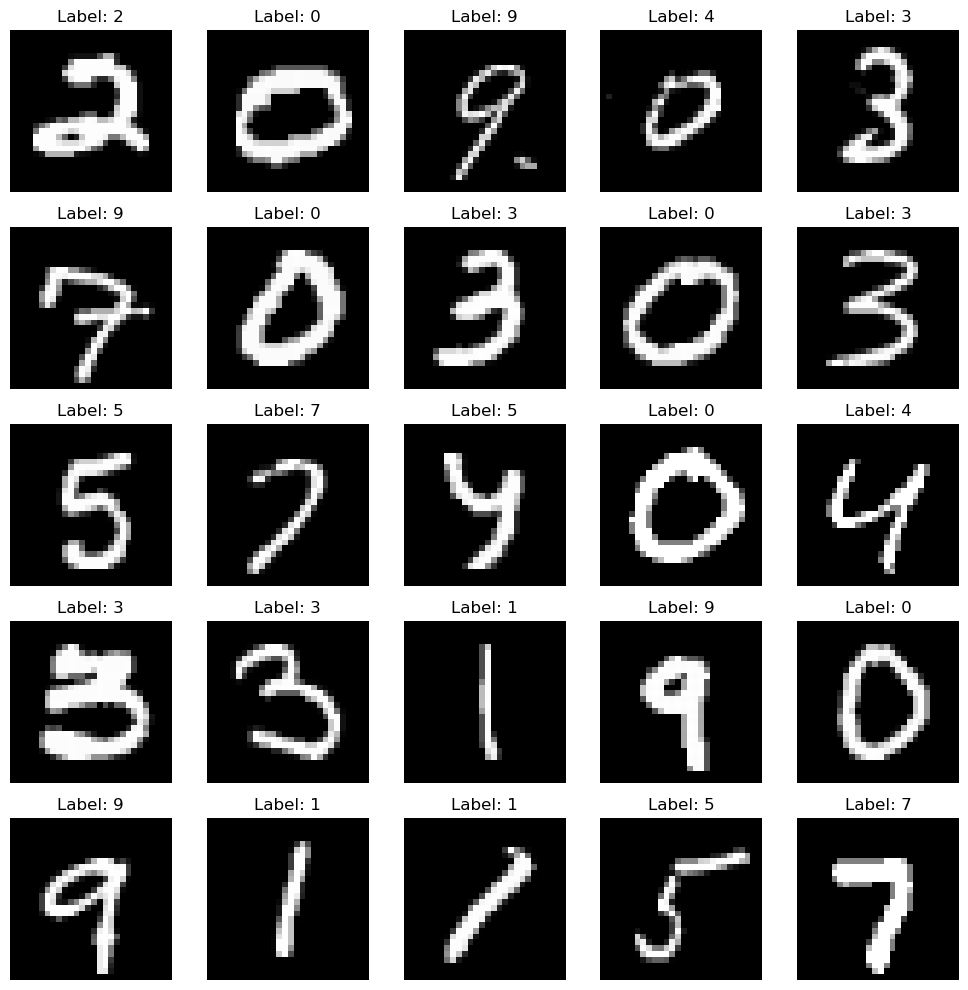

In [37]:
# Normalizing the pixel values
test_new = scaler.transform(test_new)

# Decision Tree Predictions
test_preds = clf.predict(test_new)


# Plotting the images with their predictions
plot_digits(test_new, test_preds, num_images=25)


In [ ]:
print()

/home/tazmeen/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



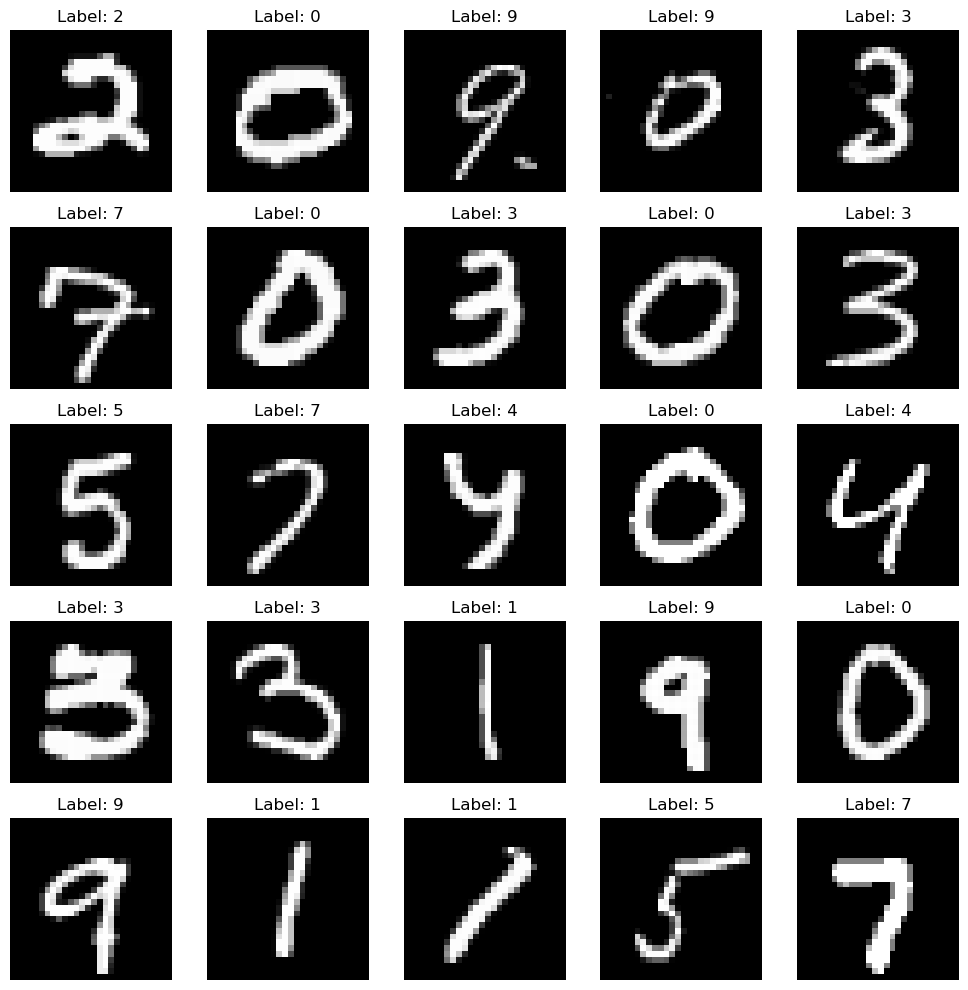

In [40]:

# SVM Predictions
svm_predicts = svm_clf.predict(test_new)
plot_digits(test_new, svm_predicts, num_images=25)
